In [6]:
#!pip install tensorflow_text

In [7]:
import requests
import nltk
import spacy
import tensorflow as tf
#import tensorflow_text as tf_text
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
import numpy as np
from tensorflow.keras import utils

In [8]:
import requests
import os

# 10.5281/zenodo.17714465
record_id = '17714465'
filename_to_download = 'dataset_posts_tommyfish.xlsx'

api_url = f'https://zenodo.org/api/records/{record_id}'

try:
    print(f"Searching for file '{filename_to_download}' in Zenodo repository with ID: {record_id}...")

    response = requests.get(api_url)
    response.raise_for_status()
    data = response.json()

    file_url = None
    for file in data.get('files', []):
        if file.get('key') == filename_to_download:
            file_url = file.get('links', {}).get('self')
            break

    if file_url:
        print(f"File '{filename_to_download}' found. Starting download...")

        file_response = requests.get(file_url, stream=True)
        file_response.raise_for_status()

        # Save the file to the current directory
        with open(filename_to_download, 'wb') as f:
            for chunk in file_response.iter_content(chunk_size=8192):
                f.write(chunk)

        print(f"File '{filename_to_download}' downloaded successfully.")
    else:
        print(f"File '{filename_to_download}' not found in the repository.")

except requests.exceptions.RequestException as e:
    print(f"An error occurred while accessing Zenodo: {e}")

posts = pd.read_excel('dataset_posts_tommyfish.xlsx')

renaming_map = {
    'Проект': 'Project',
    'Аккаунт': 'Account',
    'Дата': 'Date',
    'Тип': 'Type',
    'Ссылка': 'Link',
    'Текст': 'Text',
    'Лайков': 'Likes',
    'Комментариев': 'Comments',
    'Репостов': 'Reposts',
    'Просмотров': 'Views',
    'Подписчика': 'Follower',
    'Прирост': 'Growth'
}

posts.rename(columns=renaming_map, inplace=True)
posts

Searching for file 'dataset_posts_tommyfish.xlsx' in Zenodo repository with ID: 17714465...
File 'dataset_posts_tommyfish.xlsx' found. Starting download...
File 'dataset_posts_tommyfish.xlsx' downloaded successfully.


,Project,Account,Date,Type,Link,Text,Likes,Comments,Reposts,Views,Follower,Growth
0,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-26,Изображение\nИзображение,https://vk.com/wall-171840666_168847\nhttps://...,Скоро День рождения? \nА может быть он уже сег...,13,0,3,3006,85125,569
1,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-27,Видео\nИзображение,https://vk.com/wall-171840666_169542\nhttps://...,Подводим итоги конкурса фото-отзывов📸 Поздравл...,7,0,0,3396,85694,438
2,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-28,Изображение\nИзображение,https://vk.com/wall-171840666_170560\nhttps://...,nan\nСкоро День рождения? \nА может быть он уж...,24,0,3,4211,86132,528
3,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-01,Изображение\nИзображение,https://vk.com/wall-171840666_171068\nhttps://...,У нас есть сеты любой случай! 😌 \n– На большую...,14,0,0,3759,86660,449
4,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-02,Изображение\nИзображение,https://vk.com/wall-171840666_171847\nhttps://...,"Так ребят, сегодня последний день действия про...",13,2,1,3036,87109,421
...,...,...,...,...,...,...,...,...,...,...,...,...
297,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-26,Изображение\nИзображение,https://vk.com/wall-171840666_287124\nhttps://...,До Нового года осталось всего 6 дней! 🎄 \n \nК...,13,0,2,3781,105751,0
298,Общая категория\nОбщая категория\nОбщая категория,tommyfish\ntommyfish\ntommyfish,2023-12-27,Изображение\nИзображение\nТекст,https://vk.com/wall-171840666_287403\nhttps://...,А ВЫ БУДЕТЕ РАБОТАТЬ В ПРАЗДНИКИ? 🎄 \n \nЧем б...,6,0,4,4195,105751,73
299,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-28,Изображение\nИзображение,https://vk.com/wall-171840666_287651\nhttps://...,И роллы😍\nБесплатных роллов много не бывает!\n...,15,0,0,11370,105824,0
300,Общая категория,tommyfish,2023-12-30,Текст,https://vk.com/wall-171840666_287948,До Нового года 2 дня!\nОжидание на текущие зак...,8,0,4,15770,105824,87


In [9]:
posts.drop(posts.index[-1], inplace=True)
posts.dropna()
f_posts = pd.DataFrame(columns = posts.columns)

for i, r in posts.iterrows():
  if type(posts.loc[i]['Text']) != float: f_posts.loc[len(f_posts)] = r
posts = f_posts
posts

,Project,Account,Date,Type,Link,Text,Likes,Comments,Reposts,Views,Follower,Growth
0,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-26 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_168847\nhttps://...,Скоро День рождения? \nА может быть он уже сег...,13,0,3,3006,85125,569
1,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-27 00:00:00,Видео\nИзображение,https://vk.com/wall-171840666_169542\nhttps://...,Подводим итоги конкурса фото-отзывов📸 Поздравл...,7,0,0,3396,85694,438
2,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-28 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_170560\nhttps://...,nan\nСкоро День рождения? \nА может быть он уж...,24,0,3,4211,86132,528
3,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-01 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_171068\nhttps://...,У нас есть сеты любой случай! 😌 \n– На большую...,14,0,0,3759,86660,449
4,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-02 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_171847\nhttps://...,"Так ребят, сегодня последний день действия про...",13,2,1,3036,87109,421
...,...,...,...,...,...,...,...,...,...,...,...,...
282,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-25 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_286874\nhttps://...,"Друзья, за прошлую неделю собралось менее 30 ф...",9,0,0,3255,105751,0
283,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-26 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_287124\nhttps://...,До Нового года осталось всего 6 дней! 🎄 \n \nК...,13,0,2,3781,105751,0
284,Общая категория\nОбщая категория\nОбщая категория,tommyfish\ntommyfish\ntommyfish,2023-12-27 00:00:00,Изображение\nИзображение\nТекст,https://vk.com/wall-171840666_287403\nhttps://...,А ВЫ БУДЕТЕ РАБОТАТЬ В ПРАЗДНИКИ? 🎄 \n \nЧем б...,6,0,4,4195,105751,73
285,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-28 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_287651\nhttps://...,И роллы😍\nБесплатных роллов много не бывает!\n...,15,0,0,11370,105824,0


In [10]:
posts = posts.drop(posts.index[122:154], axis=0)
posts

,Project,Account,Date,Type,Link,Text,Likes,Comments,Reposts,Views,Follower,Growth
0,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-26 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_168847\nhttps://...,Скоро День рождения? \nА может быть он уже сег...,13,0,3,3006,85125,569
1,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-27 00:00:00,Видео\nИзображение,https://vk.com/wall-171840666_169542\nhttps://...,Подводим итоги конкурса фото-отзывов📸 Поздравл...,7,0,0,3396,85694,438
2,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-28 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_170560\nhttps://...,nan\nСкоро День рождения? \nА может быть он уж...,24,0,3,4211,86132,528
3,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-01 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_171068\nhttps://...,У нас есть сеты любой случай! 😌 \n– На большую...,14,0,0,3759,86660,449
4,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-02 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_171847\nhttps://...,"Так ребят, сегодня последний день действия про...",13,2,1,3036,87109,421
...,...,...,...,...,...,...,...,...,...,...,...,...
282,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-25 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_286874\nhttps://...,"Друзья, за прошлую неделю собралось менее 30 ф...",9,0,0,3255,105751,0
283,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-26 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_287124\nhttps://...,До Нового года осталось всего 6 дней! 🎄 \n \nК...,13,0,2,3781,105751,0
284,Общая категория\nОбщая категория\nОбщая категория,tommyfish\ntommyfish\ntommyfish,2023-12-27 00:00:00,Изображение\nИзображение\nТекст,https://vk.com/wall-171840666_287403\nhttps://...,А ВЫ БУДЕТЕ РАБОТАТЬ В ПРАЗДНИКИ? 🎄 \n \nЧем б...,6,0,4,4195,105751,73
285,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-28 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_287651\nhttps://...,И роллы😍\nБесплатных роллов много не бывает!\n...,15,0,0,11370,105824,0


In [11]:
posts.reset_index(drop=True, inplace=True)
posts

,Project,Account,Date,Type,Link,Text,Likes,Comments,Reposts,Views,Follower,Growth
0,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-26 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_168847\nhttps://...,Скоро День рождения? \nА может быть он уже сег...,13,0,3,3006,85125,569
1,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-27 00:00:00,Видео\nИзображение,https://vk.com/wall-171840666_169542\nhttps://...,Подводим итоги конкурса фото-отзывов📸 Поздравл...,7,0,0,3396,85694,438
2,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-02-28 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_170560\nhttps://...,nan\nСкоро День рождения? \nА может быть он уж...,24,0,3,4211,86132,528
3,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-01 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_171068\nhttps://...,У нас есть сеты любой случай! 😌 \n– На большую...,14,0,0,3759,86660,449
4,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-02 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_171847\nhttps://...,"Так ребят, сегодня последний день действия про...",13,2,1,3036,87109,421
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-25 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_286874\nhttps://...,"Друзья, за прошлую неделю собралось менее 30 ф...",9,0,0,3255,105751,0
251,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-26 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_287124\nhttps://...,До Нового года осталось всего 6 дней! 🎄 \n \nК...,13,0,2,3781,105751,0
252,Общая категория\nОбщая категория\nОбщая категория,tommyfish\ntommyfish\ntommyfish,2023-12-27 00:00:00,Изображение\nИзображение\nТекст,https://vk.com/wall-171840666_287403\nhttps://...,А ВЫ БУДЕТЕ РАБОТАТЬ В ПРАЗДНИКИ? 🎄 \n \nЧем б...,6,0,4,4195,105751,73
253,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-28 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_287651\nhttps://...,И роллы😍\nБесплатных роллов много не бывает!\n...,15,0,0,11370,105824,0


# Dividing the data into training and test sets

In [12]:
#auxiliary function of dividing dataframes
def split_dataframe(dataframe, test_proportion):
    total_size = len(dataframe)
    test_size = int(total_size * test_proportion)
    indices = np.arange(total_size)
    np.random.shuffle(indices)
    train_indices = indices[0:total_size-test_size]
    test_indices = indices[total_size - test_size:]
    return dataframe.iloc[train_indices], dataframe.iloc[test_indices]

In [13]:
train, test = split_dataframe(posts, 0.3)

In [14]:
train

,Project,Account,Date,Type,Link,Text,Likes,Comments,Reposts,Views,Follower,Growth
234,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-09 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_282304\nhttps://...,nan\nОТКРЫВАЕМ ПРЕДЗАКАЗЫ НА 31 ДЕКАБРЯ 🎄\n\nХ...,56,1,51,14551,105339,83
184,Общая категория,tommyfish,2023-10-13 00:00:00,Изображение,https://vk.com/wall-171840666_264834,Правильная подготовка к вечеру пятницы начинае...,12,0,0,3190,103052,180
105,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-06-14 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_210956\nhttps://...,nan\nСкоро День рождения? \nА может быть он уж...,18,1,5,9173,95753,67
26,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-25 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_183517\nhttps://...,nan\nБыстро и вкусно 🔥\nЭти слова можно упомин...,16,0,20,6121,91155,31
207,Общая категория,tommyfish,2023-11-08 00:00:00,Изображение,https://vk.com/wall-171840666_272720,До конца действия промокода осталось меньше 48...,5,0,0,3884,104402,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Общая категория,tommyfish,2023-09-05 00:00:00,Изображение,https://vk.com/wall-171840666_251929,"Ребята, помогите решить задачу!\n\nСколько эмо...",14,20,0,12058,101401,0
139,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-08-23 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_247007\nhttps://...,🫣\nТы нужен нам в команду!👇\nПриглашаем кандид...,55,0,30,19013,100871,0
186,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-10-15 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_265527\nhttps://...,nan\nБесплатных роллов много не бывает!\nДарим...,18,0,4,5596,103232,0
106,Общая категория,tommyfish,2023-06-15 00:00:00,Изображение,https://vk.com/wall-171840666_211333,"Что будет, если доставка едет дольше 77 минут?...",6,0,1,2593,95820,60


In [15]:
train, test = train.reset_index(drop=True), test.reset_index(drop=True)

We highlight the correct answers




In [16]:
l_train = train['Growth'].tolist()
y_train = np.array(l_train)
y_train

l_test = test['Growth'].tolist()
y_test = np.array(l_test)
y_test

array([ 61,   0,  34,  33,  90,  46,  35, 123,  54,   0,  63,   0,  25,
         0,  54,  99,  38,   0, 114,   0,  41,  81,   0,  69,  70,   0,
        92,  58, 276,  51,   0, 292,  52,   0, 111, 100,   0, 133,   0,
         0,  66, 449,   0,  47,   0, 110,   0,  46,   0,  76,   0,   0,
         0,   0,  57,   0,  48,   0,  73,  36,  42,  60,   0,   0,  37,
        76,  58, 467,  55,  34,  63,  94,  72, 281,  81,  46])

In [17]:
y_train[46]
np.where(y_train == 1.0)[0]
# for i in y_train:
#   print(i)
train.iloc[59]

,59
Project,Общая категория\nОбщая категория\nОбщая категория
Account,tommyfish\ntommyfish\ntommyfish
Date,2023-12-24 00:00:00
Type,Изображение\nИзображение\nТекст
Link,https://vk.com/wall-171840666_286632\nhttps://...
Text,Благодарю за оперативность.\nnan\nДо Нового го...
Likes,16
Comments,1
Reposts,0
Views,7669


# Tokenization of text

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils


In [19]:
#the number of tokenizer words
num_words = 100000

In [20]:
tokenizer = Tokenizer(num_words=num_words)

In [21]:
descrs = train['Text']

In [22]:
tokenizer.fit_on_texts(descrs)

In [23]:
tokenizer.word_index

{'в': 1,
 'и': 2,
 'с': 3,
 'сет': 4,
 'vk': 5,
 'на': 6,
 'https': 7,
 '—': 8,
 'не': 9,
 'фото': 10,
 'при': 11,
 '🍱': 12,
 'по': 13,
 'от': 14,
 '3': 15,
 'дня': 16,
 'промокод': 17,
 'cc': 18,
 'com': 19,
 'заказ': 20,
 'всем': 21,
 'заказе': 22,
 'а': 23,
 'дарим': 24,
 'за': 25,
 'до': 26,
 'шт': 27,
 'приложение': 28,
 'cn7bhm': 29,
 'итоги': 30,
 'можно': 31,
 'роллов': 32,
 'мы': 33,
 '🍣': 34,
 'мини': 35,
 'для': 36,
 'ролл': 37,
 'действует': 38,
 'ссылке': 39,
 'вы': 40,
 'роллы': 41,
 'после': 42,
 'что': 43,
 'подарок': 44,
 'через': 45,
 '1200': 46,
 'лайт': 47,
 'если': 48,
 'уже': 49,
 'к': 50,
 'конкурса': 51,
 'день': 52,
 'сегодня': 53,
 'филадельфия': 54,
 'именинникам': 55,
 'др': 56,
 'события': 57,
 'app6408974': 58,
 'отзывов': 59,
 'этот': 60,
 'креветкой': 61,
 'свой': 62,
 'быть': 63,
 'рублей': 64,
 '171840666': 65,
 '😻': 66,
 'вас': 67,
 'вам': 68,
 'кто': 69,
 '30': 70,
 'о': 71,
 'акция': 72,
 'состав': 73,
 'только': 74,
 'условия': 75,
 'рождения': 76,

# Converting descriptions to numeric representation

In [24]:
sequences = tokenizer.texts_to_sequences(descrs)


In [25]:
index = 1
print(descrs[index])
print(sequences[index])

Правильная подготовка к вечеру пятницы начинается с заказа роллов! 
Чтобы не томиться в ожидании, советуем оформить доставку заранее 👌🏻 Меню: http://vk.cc/c0vSiY
[532, 445, 50, 533, 682, 534, 3, 235, 32, 139, 9, 535, 1, 536, 352, 152, 270, 320, 537, 96, 236, 5, 18, 291]


In [26]:
tokenizer.word_index['дарим']

24

In [27]:
#determining the max length
max1 = 0
for i in sequences:
  if len(i) > max1: max1 = len(i)
max1

299

In [28]:
for i in range(0, len(sequences)):
  print(i, '\t', sequences[i])

0 	 [124, 923, 439, 6, 234, 159, 350, 679, 924, 243, 925, 3, 386, 256, 144, 288, 289, 680, 681, 440, 320, 2, 152, 290, 49, 441, 12, 439, 528, 6, 442, 184, 26, 321, 185, 152, 290, 31, 74, 1, 269, 322, 186, 529, 244, 351, 530, 387, 443, 234, 159, 257, 9, 531, 388, 28, 31, 13, 39, 7, 5, 18, 444]
1 	 [532, 445, 50, 533, 682, 534, 3, 235, 32, 139, 9, 535, 1, 536, 352, 152, 270, 320, 537, 96, 236, 5, 18, 291]
2 	 [124, 87, 52, 76, 23, 90, 63, 77, 49, 53, 66, 97, 60, 98, 92, 1, 99, 100, 2, 93, 23, 71, 101, 102, 103, 94, 104, 24, 21, 55, 35, 4, 11, 105, 22, 14, 46, 106, 107, 108, 1, 73, 84, 54, 47, 3, 61, 109, 37, 3, 110, 17, 56, 72, 38, 15, 16, 26, 2, 15, 16, 42, 57]
3 	 [124, 389, 2, 258, 153, 390, 926, 31, 927, 1, 928, 929, 3, 292, 391, 33, 154, 52, 293, 36, 67, 2, 930, 683, 3, 684, 931, 197]
4 	 [26, 932, 353, 446, 447, 169, 448, 933, 538, 111, 131, 74, 26, 685, 449, 323, 24, 68, 450, 37, 259, 451, 66, 260, 11, 22, 14, 324, 155, 27, 13, 78, 934, 14, 354, 125, 187, 27, 13, 78, 935, 34, 1, 3

We reduce the length of the names to one value.ю

In [29]:
x_train = pad_sequences(sequences, maxlen = max1)
x_train

array([[  0,   0,   0, ...,   5,  18, 444],
       [  0,   0,   0, ...,   5,  18, 291],
       [  0,   0,   0, ...,  16,  42,  57],
       ...,
       [  0,   0,   0, ...,   5,  18,  29],
       [  0,   0,   0, ...,   5,  18,  29],
       [  0,   0,   0, ...,  19,  58, 392]], dtype=int32)

# Convolutional neural network

In [30]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [31]:
type(max1)

int

In [32]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max1))
#model_cnn.add(Embedding(num_words, 32, input_length=max1))
model_cnn.add(Conv1D(500, 3, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(1))#, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model_cnn.compile(optimizer='adam',
              loss='mae',
              metrics=['mae', 'mse'])
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Creating Callback

In [34]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path,
                                      #monitor='val_accuracy',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      verbose=1)

In [35]:
history_cnn = model_cnn.fit(x_train,
                            y_train,
                            epochs=15,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 72.4760 - mae: 72.4760 - mse: 16903.7832
Epoch 1: val_loss improved from inf to 61.34406, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 71.5331 - mae: 71.5331 - mse: 16481.8809 - val_loss: 61.3441 - val_mae: 61.3441 - val_mse: 8362.0859
Epoch 2/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 75.3463 - mae: 75.3463 - mse: 18281.1250
Epoch 2: val_loss improved from 61.34406 to 61.26914, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 71.5013 - mae: 71.5013 - mse: 16498.4277 - val_loss: 61.2691 - val_mae: 61.2691 - val_mse: 8336.7656
Epoch 3/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - loss: 62.7663 - mae: 62.7663 - mse: 11448.3242
Epoch 3: val_loss improved from 61.26914 to 61.17862, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 67.2623 - mae: 67.2623 - mse: 14198.2529 - val_loss: 61.1786 - val_mae: 61.1786 - val_mse: 8306.7773
Epoch 4/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 70.3112 - mae: 70.3112 - mse: 14535.1895
Epoch 4: val_loss improved from 61.17862 to 61.07253, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 69.7241 - mae: 69.7241 - mse: 15203.6133 - val_loss: 61.0725 - val_mae: 61.0725 - val_mse: 8272.1387
Epoch 5/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 65.9449 - mae: 65.9449 - mse: 13858.5508
Epoch 5: val_loss improved from 61.07253 to 60.94456, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 68.1990 - mae: 68.1990 - mse: 14948.5459 - val_loss: 60.9446 - val_mae: 60.9446 - val_mse: 8230.7383
Epoch 6/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 66.2502 - mae: 66.2502 - mse: 15739.8828
Epoch 6: val_loss improved from 60.94456 to 60.78118, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 68.2151 - mae: 68.2151 - mse: 15539.9502 - val_loss: 60.7812 - val_mae: 60.7812 - val_mse: 8178.2275
Epoch 7/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 66.4811 - mae: 66.4811 - mse: 14490.7617
Epoch 7: val_loss improved from 60.78118 to 60.56763, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 68.1897 - mae: 68.1897 - mse: 15078.4033 - val_loss: 60.5676 - val_mae: 60.5676 - val_mse: 8109.8169
Epoch 8/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 72.2109 - mae: 72.2109 - mse: 17560.1309
Epoch 8: val_loss improved from 60.56763 to 60.28569, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 69.9705 - mae: 69.9705 - mse: 16045.6826 - val_loss: 60.2857 - val_mae: 60.2857 - val_mse: 8020.0303
Epoch 9/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 65.2050 - mae: 65.2050 - mse: 13903.1221
Epoch 9: val_loss improved from 60.28569 to 59.91072, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 67.4545 - mae: 67.4545 - mse: 14748.1875 - val_loss: 59.9107 - val_mae: 59.9107 - val_mse: 7901.6685
Epoch 10/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 67.5405 - mae: 67.5405 - mse: 14640.2354
Epoch 10: val_loss improved from 59.91072 to 59.41441, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 68.0238 - mae: 68.0238 - mse: 14896.8906 - val_loss: 59.4144 - val_mae: 59.4144 - val_mse: 7747.2646
Epoch 11/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 63.5659 - mae: 63.5659 - mse: 13495.4463
Epoch 11: val_loss improved from 59.41441 to 58.77087, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 66.3729 - mae: 66.3729 - mse: 14385.1357 - val_loss: 58.7709 - val_mae: 58.7709 - val_mse: 7551.3804
Epoch 12/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 70.6725 - mae: 70.6725 - mse: 15846.2891
Epoch 12: val_loss improved from 58.77087 to 57.93199, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - loss: 68.4274 - mae: 68.4274 - mse: 15016.3896 - val_loss: 57.9320 - val_mae: 57.9320 - val_mse: 7302.9209
Epoch 13/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 61.6747 - mae: 61.6747 - mse: 10986.6504
Epoch 13: val_loss improved from 57.93199 to 56.87703, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 64.9896 - mae: 64.9896 - mse: 13182.4609 - val_loss: 56.8770 - val_mae: 56.8770 - val_mse: 7006.0142
Epoch 14/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 64.2120 - mae: 64.2120 - mse: 12900.2217
Epoch 14: val_loss improved from 56.87703 to 55.54965, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 65.2606 - mae: 65.2606 - mse: 13583.3145 - val_loss: 55.5496 - val_mae: 55.5496 - val_mse: 6655.7485
Epoch 15/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 67.5723 - mae: 67.5723 - mse: 14858.6387
Epoch 15: val_loss improved from 55.54965 to 53.89888, saving model to best_model_cnn.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 65.7433 - mae: 65.7433 - mse: 13960.1230 - val_loss: 53.8989 - val_mae: 53.8989 - val_mse: 6254.5947


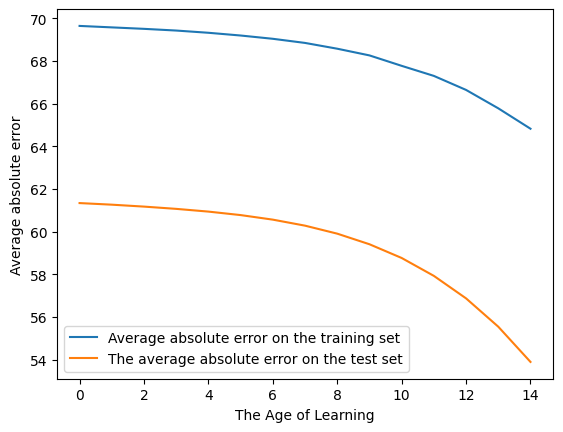

In [36]:
plt.plot(history_cnn.history['mae'],
         label='Average absolute error on the training set')
plt.plot(history_cnn.history['val_mae'],
         label='The average absolute error on the test set')
plt.xlabel('The Age of Learning')
plt.ylabel('Average absolute error')
plt.legend()
plt.show()

# Recurrent network LSTM

In [37]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max1))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(1))#  activation='softmax'))

In [38]:
model_lstm.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

In [39]:
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path,
                                      monitor='mse',
                                      save_best_only=True,
                                      verbose=1)

In [41]:
history_lstm = model_lstm.fit(x_train,
                              y_train,
                              epochs=15,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 16939.8672 - mae: 70.8441 - mse: 16939.8672
Epoch 1: mse improved from inf to 15650.65723, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 397ms/step - loss: 16080.3936 - mae: 70.0613 - mse: 16080.3936 - val_loss: 8393.3994 - val_mae: 61.4333 - val_mse: 8393.3994
Epoch 2/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13674.9336 - mae: 66.1404 - mse: 13674.9336
Epoch 2: mse improved from 15650.65723 to 15646.86328, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 14989.5537 - mae: 68.4880 - mse: 14989.5537 - val_loss: 8390.4678 - val_mae: 61.4238 - val_mse: 8390.4678
Epoch 3/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15911.4004 - mae: 68.8214 - mse: 15911.4004
Epoch 3: mse improved from 15646.86328 to 15643.30859, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 15732.6729 - mae: 69.3766 - mse: 15732.6729 - val_loss: 8387.3320 - val_mae: 61.4138 - val_mse: 8387.3320
Epoch 4/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 12972.8242 - mae: 66.0888 - mse: 12972.8242
Epoch 4: mse improved from 15643.30859 to 15639.19434, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 14750.4043 - mae: 68.4600 - mse: 14750.4043 - val_loss: 8383.7939 - val_mae: 61.4026 - val_mse: 8383.7939
Epoch 5/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 18244.9883 - mae: 74.8562 - mse: 18244.9883
Epoch 5: mse improved from 15639.19434 to 15634.93750, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 16504.9551 - mae: 71.3767 - mse: 16504.9551 - val_loss: 8379.7607 - val_mae: 61.3898 - val_mse: 8379.7607
Epoch 6/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 18498.6641 - mae: 77.9719 - mse: 18498.6641
Epoch 6: mse improved from 15634.93750 to 15629.92871, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 16586.1738 - mae: 72.4085 - mse: 16586.1738 - val_loss: 8375.1133 - val_mae: 61.3752 - val_mse: 8375.1133
Epoch 7/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 14005.4688 - mae: 66.6367 - mse: 14005.4688
Epoch 7: mse improved from 15629.92871 to 15623.65527, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 15084.2598 - mae: 68.6215 - mse: 15084.2598 - val_loss: 8369.7197 - val_mae: 61.3583 - val_mse: 8369.7197
Epoch 8/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 16137.8838 - mae: 70.1938 - mse: 16137.8838
Epoch 8: mse improved from 15623.65527 to 15616.90332, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 15790.5635 - mae: 69.7978 - mse: 15790.5635 - val_loss: 8363.3789 - val_mae: 61.3388 - val_mse: 8363.3789
Epoch 9/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14267.6230 - mae: 62.0873 - mse: 14267.6230
Epoch 9: mse improved from 15616.90332 to 15608.22168, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 15161.3555 - mae: 67.0829 - mse: 15161.3555 - val_loss: 8355.9346 - val_mae: 61.3163 - val_mse: 8355.9346
Epoch 10/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 14293.7783 - mae: 66.5112 - mse: 14293.7783
Epoch 10: mse improved from 15608.22168 to 15598.73438, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 15163.7490 - mae: 68.5445 - mse: 15163.7490 - val_loss: 8347.0674 - val_mae: 61.2900 - val_mse: 8347.0674
Epoch 11/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 15899.3955 - mae: 70.4432 - mse: 15899.3955
Epoch 11: mse improved from 15598.73438 to 15587.58984, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 15691.5254 - mae: 69.8391 - mse: 15691.5254 - val_loss: 8336.3594 - val_mae: 61.2588 - val_mse: 8336.3594
Epoch 12/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12237.1611 - mae: 62.7491 - mse: 12237.1611
Epoch 12: mse improved from 15587.58984 to 15573.33691, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 14461.2783 - mae: 67.2543 - mse: 14461.2783 - val_loss: 8323.4932 - val_mae: 61.2219 - val_mse: 8323.4932
Epoch 13/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14663.8320 - mae: 68.7249 - mse: 14663.8320
Epoch 13: mse improved from 15573.33691 to 15557.67090, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 15259.7246 - mae: 69.2242 - mse: 15259.7246 - val_loss: 8308.2021 - val_mae: 61.1784 - val_mse: 8308.2021
Epoch 14/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 11999.2578 - mae: 62.1895 - mse: 11999.2578
Epoch 14: mse improved from 15557.67090 to 15538.06543, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 14358.4629 - mae: 67.0161 - mse: 14358.4629 - val_loss: 8290.5771 - val_mae: 61.1285 - val_mse: 8290.5771
Epoch 15/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 16302.4277 - mae: 71.6124 - mse: 16302.4277
Epoch 15: mse improved from 15538.06543 to 15518.41016, saving model to best_model_lstm.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 15779.7490 - mae: 70.1307 - mse: 15779.7490 - val_loss: 8271.2773 - val_mae: 61.0741 - val_mse: 8271.2773


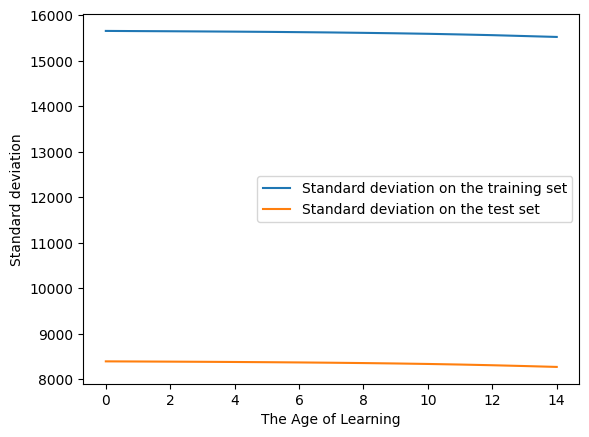

In [42]:
plt.plot(history_lstm.history['mse'],
         label='Standard deviation on the training set')
plt.plot(history_lstm.history['val_mse'],
         label='Standard deviation on the test set')
plt.xlabel('The Age of Learning')
plt.ylabel('Standard deviation')
plt.legend()
plt.show()

# Recurrent network GRU

In [43]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max1))
model_gru.add(GRU(16))
model_gru.add(Dense(1))#, activation='softmax'))

In [44]:
model_gru.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

In [45]:
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path,
                                      monitor='mse',
                                      save_best_only=True,
                                      verbose=1)

In [47]:
history_gru = model_gru.fit(x_train,
                              y_train,
                              epochs=15,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14057.4492 - mae: 68.8781 - mse: 14057.4492
Epoch 1: mse improved from inf to 15650.16309, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - loss: 15119.2588 - mae: 69.4078 - mse: 15119.2588 - val_loss: 8392.1182 - val_mae: 61.4277 - val_mse: 8392.1182
Epoch 2/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15351.1963 - mae: 65.7045 - mse: 15351.1963
Epoch 2: mse improved from 15650.16309 to 15644.33398, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - loss: 15546.6211 - mae: 68.3379 - mse: 15546.6211 - val_loss: 8387.8164 - val_mae: 61.4135 - val_mse: 8387.8164
Epoch 3/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 12699.7656 - mae: 63.1065 - mse: 12699.7656
Epoch 3: mse improved from 15644.33398 to 15638.79199, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 14659.1162 - mae: 67.4643 - mse: 14659.1162 - val_loss: 8383.4180 - val_mae: 61.3990 - val_mse: 8383.4180
Epoch 4/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 18147.6250 - mae: 75.4871 - mse: 18147.6250
Epoch 4: mse improved from 15638.79199 to 15633.68945, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 16471.6680 - mae: 71.5832 - mse: 16471.6680 - val_loss: 8378.7471 - val_mae: 61.3835 - val_mse: 8378.7471
Epoch 5/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 16543.5000 - mae: 70.2183 - mse: 16543.5000
Epoch 5: mse improved from 15633.68945 to 15627.70215, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - loss: 15932.9678 - mae: 69.8184 - mse: 15932.9678 - val_loss: 8373.6562 - val_mae: 61.3664 - val_mse: 8373.6562
Epoch 6/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12999.2031 - mae: 62.7323 - mse: 12999.2031
Epoch 6: mse improved from 15627.70215 to 15621.14551, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 14747.1650 - mae: 67.3141 - mse: 14747.1650 - val_loss: 8368.0869 - val_mae: 61.3475 - val_mse: 8368.0869
Epoch 7/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 17045.0508 - mae: 72.4037 - mse: 17045.0508
Epoch 7: mse improved from 15621.14551 to 15614.58496, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 16091.4072 - mae: 70.5273 - mse: 16091.4072 - val_loss: 8361.9014 - val_mae: 61.3264 - val_mse: 8361.9014
Epoch 8/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13692.1992 - mae: 66.6593 - mse: 13692.1992
Epoch 8: mse improved from 15614.58496 to 15606.70605, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - loss: 14968.5371 - mae: 68.6007 - mse: 14968.5371 - val_loss: 8355.0029 - val_mae: 61.3026 - val_mse: 8355.0029
Epoch 9/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 17614.8438 - mae: 72.0966 - mse: 17614.8438
Epoch 9: mse improved from 15606.70605 to 15598.46094, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 16270.5889 - mae: 70.4015 - mse: 16270.5889 - val_loss: 8347.2861 - val_mae: 61.2760 - val_mse: 8347.2861
Epoch 10/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 14683.6709 - mae: 69.0401 - mse: 14683.6709
Epoch 10: mse improved from 15598.46094 to 15588.75000, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 15287.0566 - mae: 69.3688 - mse: 15287.0566 - val_loss: 8338.6455 - val_mae: 61.2461 - val_mse: 8338.6455
Epoch 11/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14355.9395 - mae: 66.1075 - mse: 14355.9395
Epoch 11: mse improved from 15588.75000 to 15577.92578, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 15170.5967 - mae: 68.3745 - mse: 15170.5967 - val_loss: 8328.9385 - val_mae: 61.2123 - val_mse: 8328.9385
Epoch 12/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 17081.0586 - mae: 71.6776 - mse: 17081.0586
Epoch 12: mse improved from 15577.92578 to 15566.52930, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 16071.3721 - mae: 70.2159 - mse: 16071.3721 - val_loss: 8317.9814 - val_mae: 61.1743 - val_mse: 8317.9814
Epoch 13/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15697.0000 - mae: 69.1101 - mse: 15697.0000
Epoch 13: mse improved from 15566.52930 to 15552.88477, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 15600.9229 - mae: 69.3375 - mse: 15600.9229 - val_loss: 8305.6367 - val_mae: 61.1315 - val_mse: 8305.6367
Epoch 14/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14858.1523 - mae: 68.9363 - mse: 14858.1523
Epoch 14: mse improved from 15552.88477 to 15537.91797, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 15311.3291 - mae: 69.2591 - mse: 15311.3291 - val_loss: 8291.6836 - val_mae: 61.0831 - val_mse: 8291.6836
Epoch 15/15
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 16778.8457 - mae: 70.0621 - mse: 16778.8457
Epoch 15: mse improved from 15537.91797 to 15521.24805, saving model to best_model_gru.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 15940.4473 - mae: 69.6105 - mse: 15940.4473 - val_loss: 8276.0479 - val_mae: 61.0292 - val_mse: 8276.0479


# Checking on the testing set

In [48]:
test

,Project,Account,Date,Type,Link,Text,Likes,Comments,Reposts,Views,Follower,Growth
0,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-21 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_181943\nhttps://...,Скоро День рождения? \nА может быть он уже сег...,17,0,3,4211,90557,61
1,Общая категория,tommyfish,2023-12-05 00:00:00,Изображение,https://vk.com/wall-171840666_281135,Готовы к холодам?🤧,56,4,69,31017,105259,0
2,Общая категория,tommyfish,2023-05-06 00:00:00,Изображение,https://vk.com/wall-171840666_197418,Проведите субботу в кругу довольных друзей 🤩\n...,8,0,0,2497,93775,34
3,Общая категория,tommyfish,2023-06-23 00:00:00,Изображение,https://vk.com/wall-171840666_214119,"Кто подписан на нашу рассылку, те уже получили...",13,0,2,2880,96268,33
4,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-12-18 00:00:00,Видео\nИзображение,https://vk.com/wall-171840666_284921\nhttps://...,Подводим итоги конкурса фото-отзывов📸 Поздравл...,9,0,0,5263,105552,90
...,...,...,...,...,...,...,...,...,...,...,...,...
71,Общая категория,tommyfish,2023-04-13 00:00:00,Изображение,https://vk.com/wall-171840666_189935,"🍣 Любители суши, давайте проверим ваши знания🤔...",6,2,0,4277,92777,94
72,Общая категория\nОбщая категория,tommyfish\ntommyfish,2023-03-14 00:00:00,Изображение\nИзображение,https://vk.com/wall-171840666_179630\nhttps://...,😅\nСкоро День рождения? \nА может быть он уже ...,27,0,10,16884,90130,72
73,Общая категория,tommyfish,2023-03-10 00:00:00,Изображение,https://vk.com/wall-171840666_177372,Скоро День рождения? \nА может быть он уже сег...,11,0,4,3743,89623,281
74,Общая категория,tommyfish,2023-04-07 00:00:00,Изображение,https://vk.com/wall-171840666_187891,В международный день доставки суши нельзя не п...,23,0,5,12856,92270,81


In [50]:
test_sequences = tokenizer.texts_to_sequences(test['Text'])

In [51]:
x_test = pad_sequences(test_sequences, maxlen=max1)

In [52]:
x_test

array([[   0,    0,    0, ..., 1626,  276,   53],
       [   0,    0,    0, ...,    0, 1757,   50],
       [   0,    0,    0, ...,    5,   18,   29],
       ...,
       [   0,    0,    0, ...,   16,   42,   57],
       [   0,    0,    0, ..., 1294,    3,   12],
       [   0,    0,    0, ...,    2,  461,  850]], dtype=int32)

In [53]:
y_test

array([ 61,   0,  34,  33,  90,  46,  35, 123,  54,   0,  63,   0,  25,
         0,  54,  99,  38,   0, 114,   0,  41,  81,   0,  69,  70,   0,
        92,  58, 276,  51,   0, 292,  52,   0, 111, 100,   0, 133,   0,
         0,  66, 449,   0,  47,   0, 110,   0,  46,   0,  76,   0,   0,
         0,   0,  57,   0,  48,   0,  73,  36,  42,  60,   0,   0,  37,
        76,  58, 467,  55,  34,  63,  94,  72, 281,  81,  46])

# We evaluate the quality of the networks on the test set

One-dimensional convolutional network

In [54]:
model_cnn.load_weights(model_cnn_save_path)

In [55]:
model_cnn.evaluate(x_test, y_test, verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 51.6479 - mae: 51.6479 - mse: 7919.2793


[54.79365158081055, 54.79365158081055, 9446.9140625]

Recurrent LSTM Network

In [56]:
model_cnn.load_weights(model_cnn_save_path)

In [57]:
model_lstm.evaluate(x_test, y_test, verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9899.2686 - mae: 59.1494 - mse: 9899.2686


[11547.2685546875, 62.37590408325195, 11547.2685546875]

The GRU Recurrent Network

In [58]:
model_gru.load_weights(model_gru_save_path)

In [59]:
model_gru.evaluate(x_test, y_test, verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9907.4551 - mae: 59.1393 - mse: 9907.4551


[11557.14453125, 62.36754608154297, 11557.14453125]